# Reconstruction

The preceding code is simple, but it will take time to execute because it will call RAxML (which is
computationally intensive). If you opt to use the DendroPy interface, it might also become memory-
intensive. We will interact with RAxML, DendroPy, and Biopython, leaving you with a choice of
which interface to use; DendroPy gives you an easy way to access results, whereas Biopython is less
memory-intensive. Although there is a recipe for visualization later in this chapter, we will, nonetheless,
plot one of our generated trees here.

In [3]:
import os
import random
import shutil
import sys

import dendropy
from dendropy.interop import raxml

In [2]:
# rx.working_dir_path = 'D:\\backup\\Git\\us\\ptDtSc\\Bioinformatics_with_Python\\Chapter_7_Phylogenetics'

NameError: name 'rx' is not defined

In [4]:
ebola_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
rx = raxml.RaxmlRunner()
ebola_tree = rx.estimate_tree(ebola_data, ['-m', 'GTRGAMMA', '-N', '10'])
print('RAxML temporary directory: %s' % rx.working_dir_path)
del ebola_data

RAxML temporary directory: C:\Users\WIN10\AppData\Local\Temp\tmpm93z28dw


Remember that the size of the data structure for this is quite big; therefore, ensure that you
have enough memory to load this (at least 10 GB).

Be prepared to wait for some time. Depending on your computer, this could take more than one
hour. If it takes longer, consider restarting the process, as sometimes a RAxML bug might occur.
We will run RAxML with the GTRΓ nucleotide substitution model, as specified in the paper.

We will only perform 10 replicates to speed up the results, but you should probably do a lot
more, say 100. At the end of the process, we will delete the genome data from memory as it
takes up a lot of memory.

In [6]:
ebola_tree.write_to_path('my_ebola.nex', 'nexus')

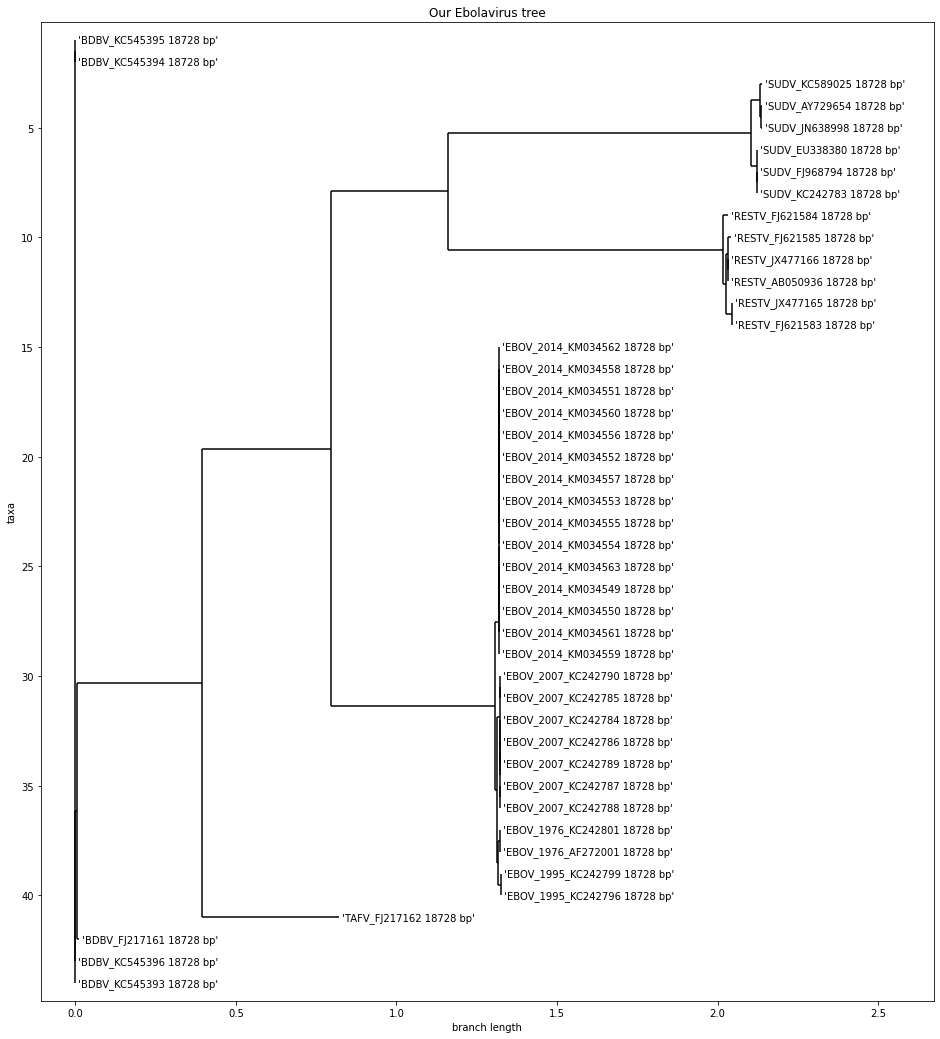

In [7]:
import matplotlib.pyplot as plt
from Bio import Phylo
# # %matplotlib inline
my_ebola_tree = Phylo.read('my_ebola.nex', 'nexus')
my_ebola_tree.name = 'Our Ebolavirus tree'

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

In [8]:
from Bio.Phylo.Applications import RaxmlCommandline
raxml_cline = RaxmlCommandline(sequences='trim.fasta',
                               model='GTRGAMMA', name='biopython',
                               num_replicates='10',
                               parsimony_seed=random.randint(0, sys.maxsize),
                               working_dir=os.getcwd() + os.sep + 'bp_rx')
print(raxml_cline)
try:
    os.mkdir('bp_rx')
except OSError:
    shutil.rmtree('bp_rx')
    os.mkdir('bp_rx')
out, err = raxml_cline()

raxmlHPC -m GTRGAMMA -n biopython -p 4080079263215300066 -s trim.fasta -w d:\backup\Git\us\ptDtSc\Bioinformatics_with_Python\Chapter_7_Phylogenetics\bp_rx -N 10


DendroPy has a more declarative interface than Biopython, so you can take care of a few extra
things. You should specify the seed (Biopython will put a fixed default of 10,000 if you do not
do so) and the working directory. With RAxML, the working directory specification requires
the absolute path.

Let’s inspect the outcome of the Biopython run. While the RAxML output is the same (save
for stochasticity) for DendroPy and Biopython, DendroPy abstracts away a few things. With
Biopython, you need to take care of the results yourself. You can also perform this with DendroPy;
however, in this case, it is optional:

In [13]:
from Bio import Phylo
biopython_tree = Phylo.read('bp_rx/RAxML_bestTree.biopython', 'newick')

The preceding code will read the best tree from the RAxML run. The name of the file was
appended with the project name that you specified in the previous step (in this case, biopython).

Take a look at the content of the bp_rx directory; here, you will find all the outputs from RAxML,
including all 10 alternative trees.

In [14]:
print(biopython_tree)


Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=1.00000050002909e-06)
            Clade(branch_length=0.00015545959821103528, name='BDBV_KC545394')
            Clade(branch_length=0.00010362078578036383, name='BDBV_KC545395')
        Clade(branch_length=0.00015502583276813325)
            Clade(branch_length=0.0001040776685673795, name='BDBV_KC545396')
            Clade(branch_length=0.00578020389068866)
                Clade(branch_length=0.3900442463466121)
                    Clade(branch_length=0.4018829448492933)
                        Clade(branch_length=0.3662808113999194)
                            Clade(branch_length=0.855258519102911)
                                Clade(branch_length=0.01816844652341182, name='RESTV_FJ621584')
                                Clade(branch_length=0.011786555209153018)
                                    Clade(branch_length=0.003907695473127336)
                                        Clade(branch_leng